In [1]:
from core.system import SystemMilcaModel
import pandas as pd
# from main import SytemMilcaModel

# crear el modelo estructural
model = SystemMilcaModel()


E = 30
v = 0.15
g = 0
b = 40
h = 50


# agregar materiales
model.add_material(name="concreto", modulus_elasticity=E,
                   poisson_ratio=v, specific_weight=g)

# # agregar secciones
model.add_rectangular_section("seccion1", "concreto", b, h)

# # agregar nodos
model.add_node(1, (0, 0))
model.add_node(2, (0, 500))
model.add_node(3, (500, 500))
model.add_node(4, (500, 0))

# # agregar elementos
model.add_element(1, "FRAME", 1, 2, "seccion1")
model.add_element(2, "FRAME", 2, 3, "seccion1")
model.add_element(3, "FRAME", 3, 4, "seccion1")

# # agregar restricciones
model.add_restraint(1, (True, True, True))
model.add_restraint(4, (True, True, True))

# # agregar patrones de carga
model.add_load_pattern(name="muerta")

# agregar cargas puntuales
# model.add_point_load(2, "muerta", fx=100)
model.add_distributed_load(2, "muerta", "LOCAL", -50, -50)

# resolver el modelo
model.solve()


df = pd.DataFrame(model.global_stiffness_matrix)
df.to_excel("stiffness_matrix.xlsx")

In [2]:
df2 = pd.DataFrame(model.element_map[1]._stiffness_matrix)
df2

,0,1,2,3,4,5
0,120.0,0.00000,0.000000,-120.0,0.00000,0.000000
1,0.0,1.16777,291.942390,0.0,-1.16777,291.942390
2,0.0,291.94239,97985.597509,0.0,-291.94239,47985.597509
3,-120.0,0.00000,0.000000,120.0,0.00000,0.000000
4,0.0,-1.16777,-291.942390,0.0,1.16777,-291.942390
5,0.0,291.94239,47985.597509,0.0,-291.94239,97985.597509


In [3]:
vector_fuerza = pd.DataFrame(model.global_force_vector)
vector_fuerza

,0
0,0.000000e+00
1,0.000000e+00
2,0.000000e+00
3,0.000000e+00
4,-1.250000e+04
5,-1.041667e+06
6,0.000000e+00
7,-1.250000e+04
8,1.041667e+06
9,0.000000e+00


In [4]:
desplazaments = pd.DataFrame(model.displacements)
desplazaments

,0
0,0.000000
1,0.000000
2,0.000000
3,8.541332
4,-104.166667
5,-7.055823
6,-8.541332
7,-104.166667
8,7.055823
9,0.000000


In [5]:
pd.options.display.float_format = '{:.2f}'.format

reactions = pd.DataFrame(model.reactions)
reactions

,0
0,2049.92
1,12500.00
2,-336084.33
3,0.00
4,-0.00
5,0.00
6,-0.00
7,-0.00
8,0.00
9,-2049.92


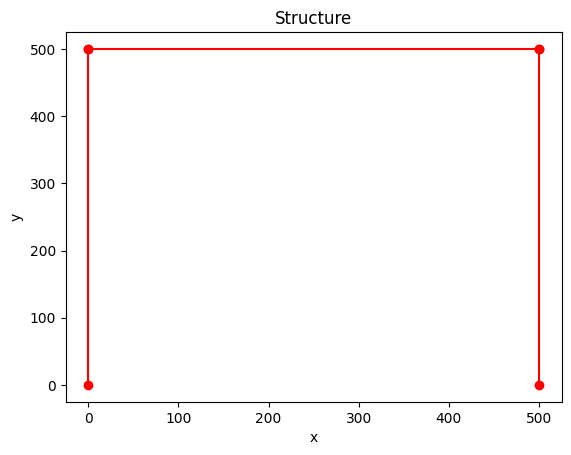

In [7]:
from display.ploter import Plotter
plotter = Plotter(model)

plotter.plot_structure()